# Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import math

# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/'
df=pd.read_csv(work_dir+'Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
df.mean()

Ad 1     0.1703
Ad 2     0.1295
Ad 3     0.0728
Ad 4     0.1196
Ad 5     0.2695
Ad 6     0.0126
Ad 7     0.1112
Ad 8     0.2091
Ad 9     0.0952
Ad 10    0.0489
dtype: float64

# Upper Confidence Bound

In [4]:
class UCB():
    def __init__(self,
                 sim_stream_file,separator=',',header=True,
                 randomize_stream=False,
                 seed_rounds=1,randomize_seed=False,
                 use_probs=False,
                 random_seed=None):
        self.sim_stream_file=sim_stream_file
        with open(self.sim_stream_file,'r') as sim_stream:
            self.sim_stream=[ [int(out) for out in sim_event.strip().split(separator)]
                              for sim_event in sim_stream.readlines()[header:] ]
        self.num_bandits=len(self.sim_stream[0])
        self.randomize_stream=randomize_stream
        self.randomize_seed=randomize_seed
        self.use_probs=use_probs
        self.n=[0]*self.num_bandits
        self.s=[0]*self.num_bandits
        self.a=[0]*self.num_bandits
        self.u=[0]*self.num_bandits
        self.p=[0]*self.num_bandits
        np.random.seed(random_seed)
        for seed_round in range(seed_rounds):
            self.seed()
    def seed(self):
        seed_pos_lst=list(range(self.num_bandits))
        if self.randomize_seed:
            np.random.shuffle(seed_pos_lst)
        print('Seeding {}...'.format(seed_pos_lst))
        for pos in seed_pos_lst:
            self.show(pos)
        self.compute()
        self.report()
    def show(self,pos):
        if self.randomize_stream:
            record_pos=np.random.randint(0,len(self.sim_stream))
        else:
            record_pos=sum(self.n)
        self.s[pos]=self.s[pos]+self.sim_stream[record_pos][pos]
        self.n[pos]=self.n[pos]+1
    def compute(self):
        self.a=[ 1.0*self.s[pos]/self.n[pos] for pos in range(self.num_bandits) ]
        self.u=[ self.a[pos]+1.0*math.sqrt(3/2*math.log(sum(self.n))/self.n[pos]) for pos in range(self.num_bandits) ]
        if np.std(self.u)!=0:
            probs=[ math.exp((u-np.mean(self.u))/np.std(self.u)) for u in self.u ]
        else:
            probs=[1]*self.num_bandits
        self.p=[ p/sum(probs) for p in probs ]
    def report(self):
        print('=== State at round {} ==='.format(sum(self.n)))
        print('Total score: {}'.format(sum(self.s)))
        for pos in range(self.num_bandits):
            print('Bandit {:d}: seen {:4d}, score {:4d}, '.format(pos,self.n[pos],self.s[pos]) + \
                  'average {:.2f}, ucb {:.2f}, prob {:.2f}'.format(self.a[pos],self.u[pos],self.p[pos]))
    def stream_it_to_me(self,num_rounds=100):
        for r in range(num_rounds):
            if self.use_probs:
                pos=np.random.choice(range(self.num_bandits),p=self.p)
            else:
                pos=np.argmax(self.u)
            self.show(pos)
            self.compute()
        self.report()

In [5]:
ucb=UCB(work_dir+'Ads_CTR_Optimisation.csv',
        seed_rounds=1,randomize_seed=False,
        randomize_stream=False,use_probs=False)

Seeding [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...
=== State at round 10 ===
Total score: 1
Bandit 0: seen    1, score    1, average 1.00, ucb 2.86, prob 0.76
Bandit 1: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 2: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 3: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 4: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 5: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 6: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 7: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 8: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 9: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03


In [6]:
ucb.stream_it_to_me(9990)

=== State at round 10000 ===
Total score: 2211
Bandit 0: seen  502, score   74, average 0.15, ucb 0.31, prob 0.04
Bandit 1: seen  364, score   43, average 0.12, ucb 0.31, prob 0.02
Bandit 2: seen  278, score   25, average 0.09, ucb 0.31, prob 0.02
Bandit 3: seen  317, score   33, average 0.10, ucb 0.31, prob 0.02
Bandit 4: seen 6434, score 1730, average 0.27, ucb 0.32, prob 0.72
Bandit 5: seen  147, score    1, average 0.01, ucb 0.31, prob 0.04
Bandit 6: seen  326, score   35, average 0.11, ucb 0.31, prob 0.03
Bandit 7: seen 1130, score  229, average 0.20, ucb 0.31, prob 0.03
Bandit 8: seen  331, score   36, average 0.11, ucb 0.31, prob 0.03
Bandit 9: seen  171, score    5, average 0.03, ucb 0.31, prob 0.05


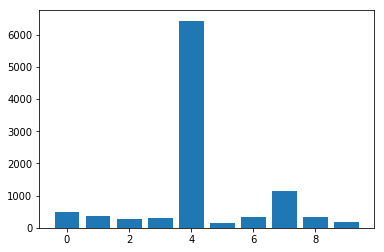

In [25]:
plt.bar(range(ucb.num_bandits),ucb.n)
plt.show()

In [26]:
ucb=UCB(work_dir+'Ads_CTR_Optimisation.csv',
        seed_rounds=1,randomize_seed=True,
        randomize_stream=False,use_probs=False)

Seeding [4, 1, 7, 3, 2, 5, 9, 6, 0, 8]...
=== State at round 10 ===
Total score: 1
Bandit 0: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 1: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 2: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 3: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 4: seen    1, score    1, average 1.00, ucb 2.86, prob 0.76
Bandit 5: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 6: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 7: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 8: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 9: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03


In [27]:
ucb.stream_it_to_me(9990)

=== State at round 10000 ===
Total score: 2174
Bandit 0: seen  637, score  104, average 0.16, ucb 0.31, prob 0.03
Bandit 1: seen  391, score   48, average 0.12, ucb 0.31, prob 0.04
Bandit 2: seen  251, score   19, average 0.08, ucb 0.31, prob 0.02
Bandit 3: seen  266, score   22, average 0.08, ucb 0.31, prob 0.03
Bandit 4: seen 6223, score 1654, average 0.27, ucb 0.31, prob 0.73
Bandit 5: seen  150, score    1, average 0.01, ucb 0.31, prob 0.02
Bandit 6: seen  335, score   36, average 0.11, ucb 0.31, prob 0.03
Bandit 7: seen 1165, score  235, average 0.20, ucb 0.31, prob 0.04
Bandit 8: seen  368, score   43, average 0.12, ucb 0.31, prob 0.03
Bandit 9: seen  214, score   12, average 0.06, ucb 0.31, prob 0.02


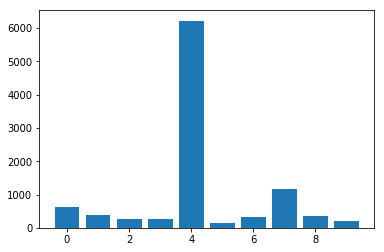

In [28]:
plt.bar(range(ucb.num_bandits),ucb.n)
plt.show()

In [29]:
ucb=UCB(work_dir+'Ads_CTR_Optimisation.csv',
        seed_rounds=1,randomize_seed=True,
        randomize_stream=True,use_probs=False)

Seeding [7, 1, 9, 0, 2, 4, 6, 8, 5, 3]...
=== State at round 10 ===
Total score: 3
Bandit 0: seen    1, score    1, average 1.00, ucb 2.86, prob 0.26
Bandit 1: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 2: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 3: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 4: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 5: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 6: seen    1, score    1, average 1.00, ucb 2.86, prob 0.26
Bandit 7: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 8: seen    1, score    1, average 1.00, ucb 2.86, prob 0.26
Bandit 9: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03


In [30]:
ucb.stream_it_to_me(9990)

=== State at round 10000 ===
Total score: 2246
Bandit 0: seen  548, score   86, average 0.16, ucb 0.32, prob 0.03
Bandit 1: seen  284, score   27, average 0.10, ucb 0.32, prob 0.03
Bandit 2: seen  208, score   12, average 0.06, ucb 0.32, prob 0.02
Bandit 3: seen  373, score   46, average 0.12, ucb 0.32, prob 0.04
Bandit 4: seen 6549, score 1777, average 0.27, ucb 0.32, prob 0.66
Bandit 5: seen  139, score    0, average 0.00, ucb 0.32, prob 0.01
Bandit 6: seen  259, score   22, average 0.08, ucb 0.32, prob 0.05
Bandit 7: seen 1141, score  235, average 0.21, ucb 0.32, prob 0.06
Bandit 8: seen  308, score   32, average 0.10, ucb 0.32, prob 0.03
Bandit 9: seen  191, score    9, average 0.05, ucb 0.32, prob 0.07


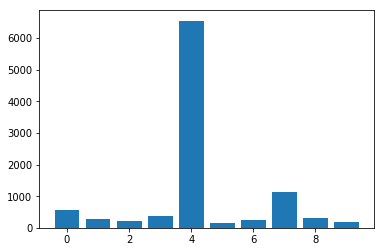

In [31]:
plt.bar(range(ucb.num_bandits),ucb.n)
plt.show()

In [32]:
ucb=UCB(work_dir+'Ads_CTR_Optimisation.csv',
        seed_rounds=1,randomize_seed=True,
        randomize_stream=True,use_probs=True)

Seeding [9, 1, 8, 4, 7, 3, 0, 2, 6, 5]...
=== State at round 10 ===
Total score: 1
Bandit 0: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 1: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 2: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 3: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 4: seen    1, score    1, average 1.00, ucb 2.86, prob 0.76
Bandit 5: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 6: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 7: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 8: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03
Bandit 9: seen    1, score    0, average 0.00, ucb 1.86, prob 0.03


In [33]:
ucb.stream_it_to_me(9990)

=== State at round 10000 ===
Total score: 2071
Bandit 0: seen  657, score   96, average 0.15, ucb 0.29, prob 0.07
Bandit 1: seen  553, score   69, average 0.12, ucb 0.28, prob 0.05
Bandit 2: seen  335, score   22, average 0.07, ucb 0.27, prob 0.03
Bandit 3: seen  424, score   40, average 0.09, ucb 0.27, prob 0.03
Bandit 4: seen 4785, score 1329, average 0.28, ucb 0.33, prob 0.49
Bandit 5: seen  247, score    5, average 0.02, ucb 0.26, prob 0.01
Bandit 6: seen  473, score   50, average 0.11, ucb 0.28, prob 0.04
Bandit 7: seen 1766, score  393, average 0.22, ucb 0.31, prob 0.19
Bandit 8: seen  484, score   56, average 0.12, ucb 0.28, prob 0.06
Bandit 9: seen  276, score   11, average 0.04, ucb 0.26, prob 0.02


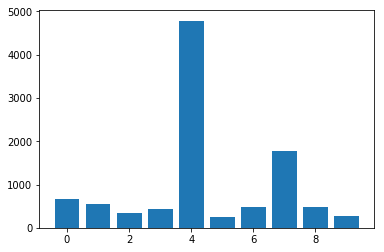

In [34]:
plt.bar(range(ucb.num_bandits),ucb.n)
plt.show()